# Trust Prediction in online social networks using machine learning techniques

## 1. Load Data

In [ ]:
import csv
import pandas as pd

df=pd.read_csv('/content/advogato_train.csv')


In [ ]:
df.columns=['node1','node2']
df.head()

,node1,node2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


Checking the data for any missing rows/ duplicates


In [ ]:
sum(df.isna().any(1))


0

In [ ]:
sum(df.duplicated())


15

In [ ]:
df.drop_duplicates(keep = False, inplace = True)
sum(df.duplicated())


0

Graph Details

In [ ]:
import networkx as nx
df.to_csv('/content/advogato_train.csv',header=False,index=False)
#storing the list of edges in a varible 
g=nx.read_edgelist('/content/advogato_train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#printing the information of graph
print(nx.info(g))

DiGraph with 6551 nodes and 51301 edges


## 2. Data Visualisation

DiGraph with 6551 nodes and 51301 edges


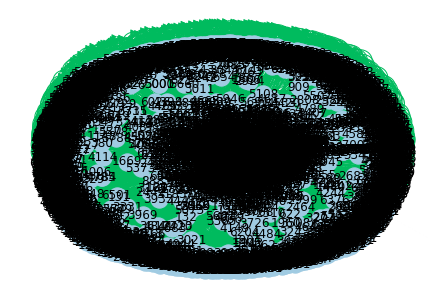

In [ ]:
import matplotlib.pyplot as plt
#creating a sample of 50 data points
pd.read_csv('/content/advogato_train.csv',nrows=50)
#reading the edgelist in a variable using networkX
subgraph=nx.read_edgelist('/content/advogato_train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#plotting the graph
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))


## 3. Data Preparation

In [ ]:
import random
r = csv.reader(open('/content/advogato_train.csv','r'))
edges = dict()
for edge in r:
	edges[(edge[0], edge[1])] = 1
    
missing_edges = set([])
while (len(missing_edges)<51301):
	a=random.randint(1, 6551)
	b=random.randint(1, 6551)
	tmp = edges.get((a,b),-1)
	if tmp == -1 and a!=b:
		try:
			if nx.shortest_path_length(g,source=a,target=b) > 2: 

				missing_edges.add((a,b))
			else:
				continue  
		except:  
				missing_edges.add((a,b))              
	else:
		continue

In [ ]:
import pickle
pickle.dump(missing_edges,open('missing_edges_final.p','wb'))

In [ ]:
from sklearn import model_selection
import numpy as np

df_pos = pd.read_csv('/content/advogato_train.csv')
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])
#Trian test split 
#Spiltted data into 80-20 
#positive links and negative links seperatly because we need positive training data only for creating graph 
#and for feature generation
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = model_selection.train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = model_selection.train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])
#removing header and saving
X_train_pos.to_csv('train_pos.csv',header=False, index=False)
X_test_pos.to_csv('test_pos.csv',header=False, index=False)
X_train_neg.to_csv('train_neg.csv',header=False, index=False)
X_test_neg.to_csv('test_neg.csv',header=False, index=False)

Number of nodes in the graph with edges 51300
Number of nodes in the graph without edges 51301
Number of nodes in the train data graph with edges 41040 = 41040
Number of nodes in the train data graph without edges 41040 = 41040
Number of nodes in the test data graph with edges 10260 = 10260
Number of nodes in the test data graph without edges 10261 = 10261


In [ ]:
import os

if (os.path.isfile('train_pos.csv')) and (os.path.isfile('test_pos_after.csv')):        
    train_graph=nx.read_edgelist('train_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('test_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    ttpi= len(train_nodes_pos.intersection(test_nodes_pos))
    ttpd = len(train_nodes_pos - test_nodes_pos)
    dptt = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',ttpi)
    print('no of people present in train but not present in test -- ',ttpd)

    print('no of people present in test but not present in train -- ',dptt)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(dptt/len(test_nodes_pos)*100))

In [ ]:
if (not os.path.isfile('train.csv')) and \
(not os.path.isfile('test.csv')) and \
(not os.path.isfile('train_y.csv')) and \
(not os.path.isfile('test_y.csv')) and \
(os.path.isfile('train_pos.csv')) and \
(os.path.isfile('test_pos.csv')) and \
(os.path.isfile('train_neg.csv')) and \
(os.path.isfile('test_neg.csv')):
    
    X_train_pos = pd.read_csv('train_pos.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('test_pos.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('train_neg.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('test_neg.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    X_train.to_csv('train.csv',header=False,index=False)
    X_test.to_csv('test.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)


Number of nodes in the train data graph with edges 41040
Number of nodes in the train data graph without edges 41040
Number of nodes in the test data graph with edges 10260
Number of nodes in the test data graph without edges 10261


## 4. Featurisarisation

### 4.1 Jaccard index

In [ ]:
def jaccard_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (len(set(g.successors(a)).union(set(g.successors(b)))))
    except:
        return 0
    return sim

In [ ]:
jaccard_for_followees(1,4)

0.06896551724137931

In [ ]:
def jaccard_for_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 (len(set(g.predecessors(a)).union(set(g.predecessors(b)))))
        return sim
    except:
        return 0

In [ ]:
jaccard_for_followers(1,3)

0.2631578947368421

### 4.2 Cosine Similarity

In [ ]:
import math
def cosine_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b))))) /\
                                    (math.sqrt(len(set(g.successors(a)))*len((set(g.successors(b))))))
        return sim
    except:
        return 0

In [ ]:
cosine_for_followees(1,3)

0.35355339059327373

In [ ]:
import math
def cosine_for_followers(a,b):
    try:
        
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                     (math.sqrt(len(set(g.predecessors(a))))*(len(set(g.predecessors(b)))))
        return sim
    except:
        return 0


In [ ]:
cosine_for_followers(1,4)

0.02672612419124244

### 4.3 Adamic-Adar Index

In [ ]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(g.successors(a)).intersection(set(g.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(g.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [ ]:
calc_adar_in(1,5)

0.6200458888731156

### 4.4 Hub Promoted Index

In [ ]:
def calc_hub_promoted_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        x=(len(set(g.successors(a))))
        y=(len(set(g.successors(b))))
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                 min(x,y)
        return sim
    except:
        return 0

In [ ]:
calc_hub_promoted_followees(1,2)

0.6666666666666666

In [ ]:
def calc_hub_promoted_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        x=(len(set(g.predecessors(a))))
        y=(len(set(g.predecessors(b))))
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 min(x,y)
        return sim
    except:
        return 0

In [ ]:
calc_hub_promoted_followers(1,5)

0.14285714285714285

### 4.5 Hub Depressed index

In [ ]:
def calc_hub_depressed_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        x=(len(set(g.predecessors(a))))
        y=(len(set(g.predecessors(b))))
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 max(x,y)
        return sim
    except:
        return 0

In [ ]:
calc_hub_depressed_followees(1,2)

0.25

In [ ]:
calc_hub_depressed_followees(1,5)

0.1111111111111111

In [ ]:
def calc_hub_depressed_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        x=(len(set(g.predecessors(a))))
        y=(len(set(g.predecessors(b))))
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 max(x,y)
        return sim
    except:
        return 0

In [ ]:
calc_hub_depressed_followers(1,5)

0.04878048780487805

### 4.6 Leicht-Holme-Newman Index

In [ ]:
def cal_lhn_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    len(set(g.successors(a)))*(len(set(g.successors(b))))
        return sim
    except:
        return 0



In [ ]:
cal_lhn_followees(1,2)

0.75

In [ ]:
def cal_lhn_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                    len(set(g.predecessors(a)))*len(set(g.predecessors(b)))
        return sim
    except:
        return 0

In [ ]:
cal_lhn_followers(10,13)

0

### 4.7 Page Rank

In [ ]:
import networkx as nx
pr = nx.pagerank(g, alpha=0.85)
pickle.dump(pr,open('page_rank.p','wb'))
mean_pr=float(sum(pr.values())) / len(pr)
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))


min 2.9549326609947087e-05
max 0.015855148217942292
mean 0.00015264845061823456


### 4.8 Katz Index

In [ ]:
katz = nx.katz.katz_centrality(g,alpha=0.005,beta=1)
pickle.dump(katz,open('katz.p','wb'))
mean_katz=0.0007483801279873423
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))


min 0.011732523426531093
max 0.059970596778821036
mean 0.012277074458391891


### 4.9 HITS

In [ ]:
hits = nx.hits(g, max_iter=100, tol=1e-08, nstart=None, normalized=True)
pickle.dump(hits,open('hits.p','wb'))
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min -9.410139041942319e-23
max 0.00898354653583198
mean 0.00015264845061822597


### 4.10 Weakly Connected Components

In [ ]:
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [ ]:
wcc=list(nx.weakly_connected_components(g))
def belongs_to_same_wcc(a,b):
    index = []
    if g.has_edge(b,a):
        return 1
    if g.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                g.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    g.add_edge(a,b)
                    return 0
                else:
                    g.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

## 5. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df_final_train = pd.read_csv('train.csv', names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)
y_train = df_final_train['indicator_link']

#test 
df_final_test = pd.read_csv('test.csv', names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)
y_test=df_final_test['indicator_link']

Our train matrix size  (82080, 3)
Our test matrix size  (20521, 3)


In [ ]:
print(df_final_test.shape)
print(df_final_train.shape)

(20521, 3)
(82080, 3)


## 6. Addition of all features


In [ ]:
df_final_train['jaccard_followers'] = df_final_train[0:82080].apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followers'] = df_final_test[0:20521].apply(lambda row:
                                            jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

df_final_train['jaccard_followees'] = df_final_train[:82080].apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followees'] = df_final_test[0:20521].apply(lambda row:
                                            jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    

df_final_train['cosine_followers'] = df_final_train[:82080].apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followers'] = df_final_test[0:20521].apply(lambda row:
                                            cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

                                          


In [ ]:
df_final_train['hub_promoted_followees'] = df_final_train[:82080].apply(lambda row:
                                            calc_hub_promoted_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_promoted_followees'] = df_final_test[0:20521].apply(lambda row:
                                            calc_hub_promoted_followees(row['source_node'],row['destination_node']),axis=1)

df_final_train['hub_promoted_followers'] = df_final_train[:82080].apply(lambda row:
                                            calc_hub_promoted_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_promoted_followers'] = df_final_test[0:20521].apply(lambda row:
                                            calc_hub_promoted_followers(row['source_node'],row['destination_node']),axis=1)

In [ ]:
df_final_train['hub_depressed_followees'] = df_final_train[:82080].apply(lambda row:
                                            calc_hub_depressed_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_depressed_followees'] = df_final_test[0:20521].apply(lambda row:
                                            calc_hub_depressed_followees(row['source_node'],row['destination_node']),axis=1)

df_final_train['hub_depressed_followers'] = df_final_train[:82080].apply(lambda row:
                                            calc_hub_depressed_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['hub_depressed_followers'] = df_final_test[0:20521].apply(lambda row:
                                            calc_hub_depressed_followers(row['source_node'],row['destination_node']),axis=1)

In [ ]:
df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))

df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))


In [ ]:
df_final_train['adar_index'] = df_final_train[:94375].apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
df_final_test['adar_index'] = df_final_test[0:24361].apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)


In [ ]:
df_final_train['lhn_followees'] = df_final_train[:82080].apply(lambda row:
                                            cal_lhn_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['lhn_followees'] = df_final_test[0:20521].apply(lambda row:
                                            cal_lhn_followees(row['source_node'],row['destination_node']),axis=1)

df_final_train['lhn_followers'] = df_final_train[:82080].apply(lambda row:
                                            cal_lhn_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['lhn_followers'] = df_final_test[0:20521].apply(lambda row:
                                            cal_lhn_followers(row['source_node'],row['destination_node']),axis=1)

In [ ]:
df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)


In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
print(df_final_train.shape)

(82080, 19)


In [ ]:
df_final_train.head(10)

,jaccard_followers,jaccard_followees,cosine_followers,hub_promoted_followees,hub_promoted_followers,hub_depressed_followees,hub_depressed_followers,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,adar_index,lhn_followees,lhn_followers,same_comp
0,0.000000,0.048387,0.000000,0.750000,0.000000,0.049180,0.000000,0.000030,0.000424,0.011733,0.015895,0.000048,0.001856,0.000000,0.001563,1.899103,45.750000,0.000000,0
1,0.090909,0.040000,0.111803,1.000000,0.500000,0.040000,0.100000,0.000099,0.000319,0.013088,0.012074,0.000479,0.000002,0.000413,0.000129,1.660964,0.040000,0.400000,0
2,0.006135,0.005038,0.013259,0.571429,0.166667,0.005057,0.006329,0.000872,0.000066,0.022290,0.012196,0.008984,0.000143,0.002805,0.000209,2.157720,0.035398,0.037975,0
3,0.012987,0.159420,0.005051,0.458333,0.125000,0.196429,0.014286,0.000111,0.000945,0.012261,0.016389,0.000651,0.000797,0.000071,0.000734,7.315854,25.666667,8.750000,0
4,0.048780,0.074074,0.019608,0.166667,0.222222,0.117647,0.058824,0.000071,0.000198,0.012324,0.014076,0.000157,0.000220,0.000095,0.000681,1.032453,1.411765,7.555556,0
5,0.001372,0.031915,0.001372,0.750000,1.000000,0.032258,0.001372,0.000040,0.008981,0.011793,0.059971,0.000269,0.002694,0.000005,0.011421,1.323056,69.750000,729.000000,0
6,0.066667,0.000000,0.094491,0.000000,0.500000,0.000000,0.071429,0.000248,0.000055,0.013770,0.012021,0.001171,0.000000,0.000618,0.000101,0.000000,0.000000,0.285714,0
7,0.000000,0.008403,0.000000,0.125000,0.000000,0.008929,0.000000,0.000265,0.000067,0.014775,0.012236,0.001474,0.000182,0.001180,0.000114,1.183295,0.071429,0.000000,0
8,0.025316,0.303030,0.021731,0.666667,0.181818,0.357143,0.028571,0.000945,0.000108,0.016389,0.012501,0.000797,0.000253,0.000734,0.000301,17.086564,10.714286,0.314286,1
9,0.033333,0.050000,0.016330,0.166667,0.166667,0.066667,0.040000,0.000077,0.000293,0.012127,0.013460,0.000070,0.000280,0.000060,0.000423,0.734361,2.500000,4.166667,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_final_train,y_train,random_state=42)

## 7. Training Model

### 7.1 Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

### Result

In [ ]:
classifier_predications= clf.predict(x_test)
print(accuracy_score(y_test,classifier_predications))

0.8358918128654971


In [ ]:
acc_svm=accuracy_score(y_test,classifier_predications)

### 7.2 Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.8357090643274854


In [ ]:
acc_log=accuracy_score(y_test, y_pred)

### 7.3 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
 
print(knn.predict(x_test))
acc_knn=knn.predict(x_test)

[1 1 0 ... 1 1 1]


In [ ]:
print(knn.score(x_test, y_test))

0.9210526315789473


In [ ]:
acc_knn=knn.score(x_test, y_test)

### 7.4 Light GBM

In [ ]:
import lightgbm as lgb
from sklearn import metrics

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.203188	training's binary_logloss: 0.203188	valid_0's binary_logloss: 0.20292	valid_0's binary_logloss: 0.20292
[40]	training's binary_logloss: 0.135719	training's binary_logloss: 0.135719	valid_0's binary_logloss: 0.13731	valid_0's binary_logloss: 0.13731
[60]	training's binary_logloss: 0.11932	training's binary_logloss: 0.11932	valid_0's binary_logloss: 0.122754	valid_0's binary_logloss: 0.122754
[80]	training's binary_logloss: 0.110674	training's binary_logloss: 0.110674	valid_0's binary_logloss: 0.117156	valid_0's binary_logloss: 0.117156
[100]	training's binary_logloss: 0.104511	training's binary_logloss: 0.104511	valid_0's binary_logloss: 0.114218	valid_0's binary_logloss: 0.114218


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))


Training accuracy 0.9564
Testing accuracy 0.9507


In [ ]:
acc_lgbm=model.score(x_test,y_test)

### 7.5 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import randint

param_dist = {"n_estimators":randint(105,125),
              "max_depth": randint(10,15),
              "min_samples_split": randint(110,190),
              "min_samples_leaf": randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(x_train,y_train)

In [ ]:
print(rf_random.best_estimator_)


RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [ ]:
clf=RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)

In [ ]:
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Train acc score',accuracy_score(y_train,y_train_pred))
print('Test acc score',accuracy_score(y_test,y_test_pred))


Train acc score 0.9436373050682261
Test acc score 0.938291910331384


In [ ]:
acc_rf=accuracy_score(y_test,y_test_pred)

Train confusion_matrix


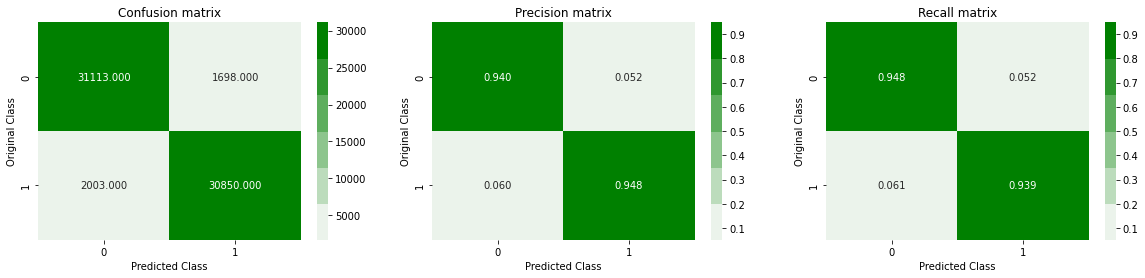

Test confusion_matrix


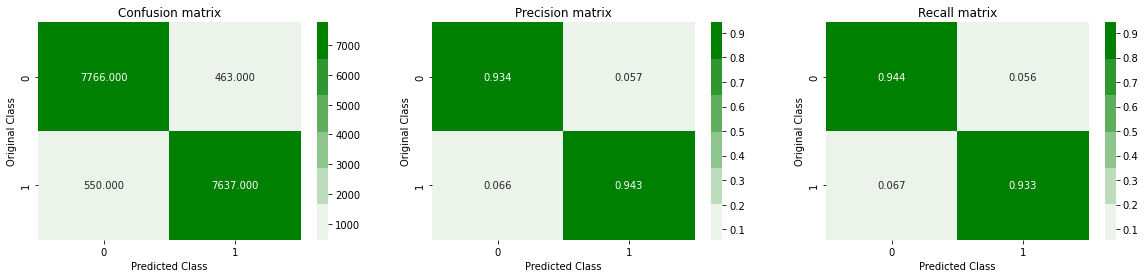

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

## 8. Analysis

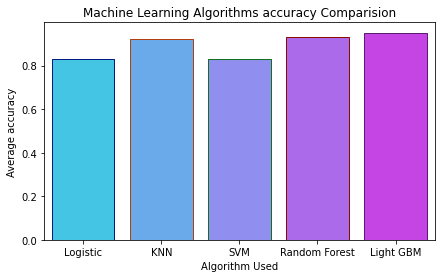

In [ ]:
data = [['Logistic', acc_log], ['KNN', acc_knn], ['SVM' , acc_svm], ['Random Forest', acc_rf], ['Light GBM', acc_lgbm]]
res_frame = pd.DataFrame(data, columns=['Algorithm Used', 'Average accuracy'])
res_frame
import seaborn as sns
plt.subplots(figsize=(7,4))
sns.barplot(x="Algorithm Used", y="Average accuracy", data = res_frame, palette='cool', edgecolor=sns.color_palette('dark',7))
plt.title('Machine Learning Algorithms accuracy Comparision')
plt.show()